In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# missing values

In [4]:
missing_columns=[feature for feature in df.columns if df[feature].isnull().sum()>=1]

In [5]:
missing_columns

[]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.describe().astype('int32')

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620
mean,243,179861,833883,855113,1100701,1224996,0,0
std,142,603858,2888242,2924048,3399180,3674128,0,0
min,1,0,0,0,0,0,0,0
25%,156,13389,0,0,0,0,0,0
50%,239,74871,14208,0,132705,214661,0,0
75%,335,208721,107315,144258,943036,1111909,0,0
max,743,92445516,59585040,49585040,356015889,356179278,1,1


In [8]:
# Removing all rows having Merchant ID (starts with 'M' in 'nameDest' column) as there is no information for customers that start with M (Merchants).

In [9]:
df_sub=df[df['nameDest'].str[0]=='M']

In [10]:
df_new=df.merge(df_sub,how='left',indicator=True)

In [11]:
df=df_new[df_new['_merge']=='left_only']

In [12]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,_merge
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.00,1,0,left_only
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.00,1,0,left_only
9,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.0,40348.79,0,0,left_only
10,1,DEBIT,9644.94,C1900366749,4465.0,0.00,C997608398,10845.0,157982.12,0,0,left_only
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.00,C476402209,5083.0,51513.44,0,0,left_only


# correlation

In [13]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.028621,-0.009874,-0.010141,0.036444,0.034297,0.039035,0.004041
amount,0.028621,1.000000,-0.041776,-0.048015,0.260521,0.433038,0.073082,0.012314
oldbalanceOrg,-0.009874,-0.041776,1.000000,0.998768,0.023454,-0.003284,0.005389,0.003690
newbalanceOrig,-0.010141,-0.048015,0.998768,1.000000,0.024044,-0.004596,-0.013400,0.003628
oldbalanceDest,0.036444,0.260521,0.023454,0.024044,1.000000,0.975226,-0.012167,-0.000798
newbalanceDest,0.034297,0.433038,-0.003284,-0.004596,0.975226,1.000000,-0.005756,-0.000823
isFraud,0.039035,0.073082,0.005389,-0.013400,-0.012167,-0.005756,1.000000,0.044095
isFlaggedFraud,0.004041,0.012314,0.003690,0.003628,-0.000798,-0.000823,0.044095,1.000000


<AxesSubplot:>

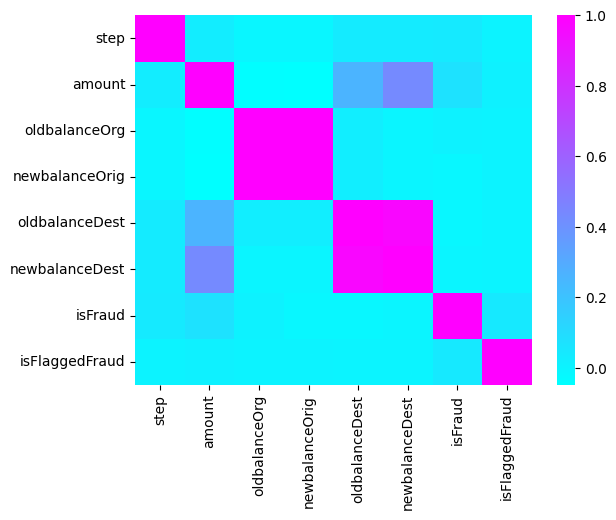

In [14]:
sns.heatmap(data=df.corr(),cmap='cool')

<AxesSubplot:xlabel='oldbalanceOrg', ylabel='newbalanceOrig'>

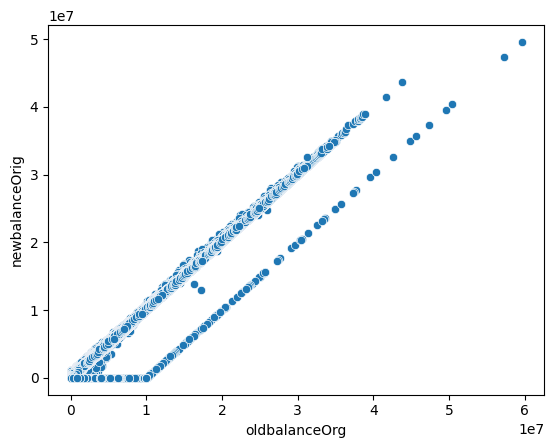

In [15]:
sns.scatterplot(x='oldbalanceOrg',y='newbalanceOrig',data=df)

<AxesSubplot:xlabel='oldbalanceDest', ylabel='newbalanceDest'>

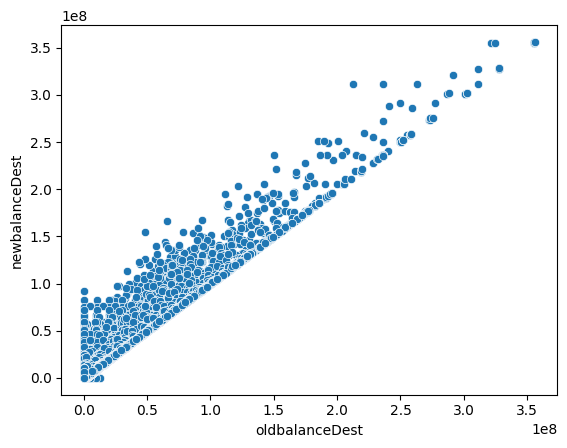

In [16]:
sns.scatterplot(x='oldbalanceDest',y='newbalanceDest',data=df)

In [17]:
# Droping 'oldbalanceDest' and 'oldbalanceorg ' as these 2 columns are highly co-related with 'newbalance Dest' and 'newbalanceorig'

In [18]:
df.drop(['oldbalanceDest','oldbalanceOrg','_merge'],axis=1,inplace=True)


C:\Users\PRATIK\AppData\Local\Temp\ipykernel_1992\3678518393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['oldbalanceDest','oldbalanceOrg','_merge'],axis=1,inplace=True)


In [19]:
df.head()

,step,type,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,0.00,C553264065,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,0.00,C38997010,0.00,1,0
9,1,DEBIT,5337.77,C712410124,36382.23,C195600860,40348.79,0,0
10,1,DEBIT,9644.94,C1900366749,0.00,C997608398,157982.12,0,0
15,1,CASH_OUT,229133.94,C905080434,0.00,C476402209,51513.44,0,0


# outliers

In [20]:
numerical_var=[feature for feature in df.columns if df[feature].dtype!='object']

In [21]:
numerical_var

['step',
 'amount',
 'newbalanceOrig',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

In [22]:
distinct_numerical_var=[feature for feature in numerical_var if df[feature].unique().size<100]

In [23]:
distinct_numerical_var

['isFraud', 'isFlaggedFraud']

In [24]:
continuous_numerical_var=[i for i in numerical_var if i not in distinct_numerical_var]

<AxesSubplot:>

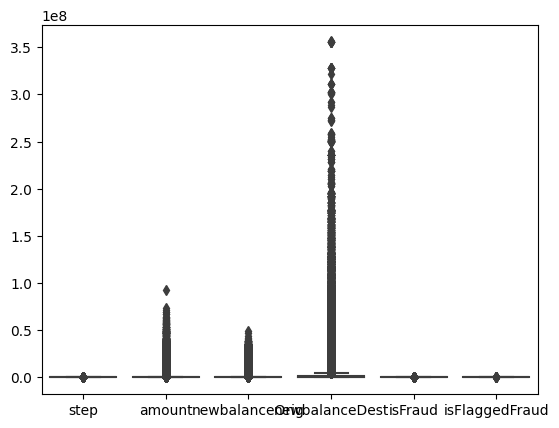

In [25]:
sns.boxplot(data=df)

In [26]:
for x in continuous_numerical_var:
    q75,q25=np.percentile(df.loc[:,x],[75,25])
    intqrt_range=q75-q25
    mini=q25-(1.50*intqrt_range)
    maxi=q75+(1.5*intqrt_range)
    print(x,mini, maxi)
    df.loc[df[x]<mini,x]=np.nan
    df.loc[df[x]>maxi,x]=np.nan

step -113.5 602.5


C:\Users\PRATIK\AppData\Local\Temp\ipykernel_1992\3834600184.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[x]<mini,x]=np.nan


amount -227513.61500000005 582084.185
newbalanceOrig -427431.615 712386.0249999999
newbalanceDest -2312173.8200000003 4444869.94


<AxesSubplot:>

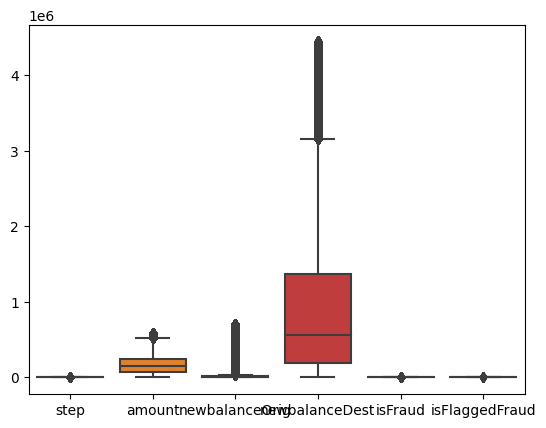

In [27]:
sns.boxplot(data=df)
    

In [28]:
df.isnull().sum()

step               68058
type                   0
amount            262663
nameOrig               0
newbalanceOrig    795189
nameDest               0
newbalanceDest    426009
isFraud                0
isFlaggedFraud         0
dtype: int64

In [29]:
df.fillna({'step':df['step'].mean(),'amount':df['amount'].mean(),'newbalanceOrig':df['newbalanceOrig'].mean(),'newbalanceDest':df['newbalanceDest'].mean()},inplace=True)

C:\Users\PRATIK\AppData\Local\Temp\ipykernel_1992\3768451611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna({'step':df['step'].mean(),'amount':df['amount'].mean(),'newbalanceOrig':df['newbalanceOrig'].mean(),'newbalanceDest':df['newbalanceDest'].mean()},inplace=True)


In [30]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
newbalanceOrig    0
nameDest          0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [31]:
df.head()

,step,type,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,isFlaggedFraud
2,1.0,TRANSFER,181.00,C1305486145,0.00,C553264065,0.00,1,0
3,1.0,CASH_OUT,181.00,C840083671,0.00,C38997010,0.00,1,0
9,1.0,DEBIT,5337.77,C712410124,36382.23,C195600860,40348.79,0,0
10,1.0,DEBIT,9644.94,C1900366749,0.00,C997608398,157982.12,0,0
15,1.0,CASH_OUT,229133.94,C905080434,0.00,C476402209,51513.44,0,0


In [32]:
df.drop(['step','nameOrig','nameDest'],axis=1,inplace=True)

C:\Users\PRATIK\AppData\Local\Temp\ipykernel_1992\2282977456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['step','nameOrig','nameDest'],axis=1,inplace=True)


In [33]:
df.head()

,type,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud
2,TRANSFER,181.00,0.00,0.00,1,0
3,CASH_OUT,181.00,0.00,0.00,1,0
9,DEBIT,5337.77,36382.23,40348.79,0,0
10,DEBIT,9644.94,0.00,157982.12,0,0
15,CASH_OUT,229133.94,0.00,51513.44,0,0


In [34]:
df['type'].unique()

array(['TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'], dtype=object)

In [35]:
df[['TRANSFER', 'CASH_OUT', 'DEBIT']]=pd.get_dummies(df['type'],drop_first=True)

C:\Users\PRATIK\AppData\Local\Temp\ipykernel_1992\977401707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['TRANSFER', 'CASH_OUT', 'DEBIT']]=pd.get_dummies(df['type'],drop_first=True)
C:\Users\PRATIK\AppData\Local\Temp\ipykernel_1992\977401707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['TRANSFER', 'CASH_OUT', 'DEBIT']]=pd.get_dummies(df['type'],drop_first=True)
C:\Users\PRATIK\AppData\Local\Temp\ipykernel_1992\977401707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a co

In [36]:
df.head()

,type,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud,TRANSFER,CASH_OUT,DEBIT
2,TRANSFER,181.00,0.00,0.00,1,0,0,0,1
3,CASH_OUT,181.00,0.00,0.00,1,0,1,0,0
9,DEBIT,5337.77,36382.23,40348.79,0,0,0,1,0
10,DEBIT,9644.94,0.00,157982.12,0,0,0,1,0
15,CASH_OUT,229133.94,0.00,51513.44,0,0,1,0,0


In [37]:
df.drop('type',axis=1,inplace=True)

C:\Users\PRATIK\AppData\Local\Temp\ipykernel_1992\1548301838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('type',axis=1,inplace=True)


In [38]:
df.head()

,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud,TRANSFER,CASH_OUT,DEBIT
2,181.00,0.00,0.00,1,0,0,0,1
3,181.00,0.00,0.00,1,0,1,0,0
9,5337.77,36382.23,40348.79,0,0,0,1,0
10,9644.94,0.00,157982.12,0,0,0,1,0
15,229133.94,0.00,51513.44,0,0,1,0,0


In [39]:
df.isFraud.value_counts()

0    4202912
1       8213
Name: isFraud, dtype: int64

In [40]:
#  This is highly imbalanced data set. Hence, performing under sampling.

In [41]:
from imblearn.under_sampling import NearMiss

In [42]:
nm=NearMiss()

In [43]:
x,y=nm.fit_resample(df.drop(['isFraud','isFlaggedFraud'],axis=1),df['isFraud'])

In [44]:
x

,amount,newbalanceOrig,newbalanceDest,TRANSFER,CASH_OUT,DEBIT
0,173337.303387,0.0,949034.220083,1,0,0
1,173337.303387,0.0,949034.220083,1,0,0
2,173337.303387,0.0,949034.220083,1,0,0
3,173337.303387,0.0,0.000000,0,0,1
4,173337.303387,0.0,0.000000,0,0,1
...,...,...,...,...,...,...
16421,339682.130000,0.0,339682.130000,1,0,0
16422,173337.303387,0.0,0.000000,0,0,1
16423,173337.303387,0.0,949034.220083,1,0,0
16424,173337.303387,0.0,0.000000,0,0,1


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.6,random_state=101)

In [47]:
x_train

,amount,newbalanceOrig,newbalanceDest,TRANSFER,CASH_OUT,DEBIT
6715,173337.303387,0.000000,949034.220083,0,0,1
4770,173337.303387,0.000000,949034.220083,0,0,1
3814,173337.303387,55675.264041,0.000000,0,0,0
12298,173337.303387,0.000000,0.000000,0,0,1
15575,173337.303387,0.000000,949034.220083,1,0,0
...,...,...,...,...,...,...
2623,173337.303387,0.000000,949034.220083,1,0,0
12363,81814.510000,0.000000,284974.660000,1,0,0
5695,173337.303387,0.000000,949034.220083,0,0,1
8006,173337.303387,0.000000,949034.220083,0,0,1


In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler=StandardScaler()

In [50]:
x_train=scaler.fit_transform(x_train)

In [51]:
x_test=scaler.transform(x_test)

In [52]:
x_train

array([[-0.0705083 , -0.2411383 ,  0.39450201, -0.88126955,  0.        ,
         1.00030446],
       [-0.0705083 , -0.2411383 ,  0.39450201, -0.88126955,  0.        ,
         1.00030446],
       [-0.0705083 ,  2.89426239, -0.98947776, -0.88126955,  0.        ,
        -0.99969563],
       ...,
       [-0.0705083 , -0.2411383 ,  0.39450201, -0.88126955,  0.        ,
         1.00030446],
       [-0.0705083 , -0.2411383 ,  0.39450201, -0.88126955,  0.        ,
         1.00030446],
       [-0.0705083 , -0.2411383 ,  0.18777958,  1.1347266 ,  0.        ,
        -0.99969563]])

In [53]:
x_test

array([[-0.0705083 , -0.2411383 ,  0.39450201, -0.88126955,  0.        ,
         1.00030446],
       [-0.0705083 , -0.2411383 ,  1.22012484,  1.1347266 ,  0.        ,
        -0.99969563],
       [-0.0705083 , -0.2411383 ,  0.39450201, -0.88126955,  0.        ,
         1.00030446],
       ...,
       [-0.34004011, -0.2411383 ,  2.00508682,  1.1347266 ,  0.        ,
        -0.99969563],
       [-0.0705083 , -0.2411383 ,  0.39450201,  1.1347266 ,  0.        ,
        -0.99969563],
       [-0.5227625 , -0.2411383 , -0.98947776, -0.88126955,  0.        ,
         1.00030446]])

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
model=LogisticRegression()

In [56]:
model.fit(x_train,y_train)

LogisticRegression()

In [57]:
y_predicted=model.predict(x_test)

In [73]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,plot_confusion_matrix,classification_report

In [59]:
accuracy_score(y_test,y_predicted)

0.7330695480140009

In [60]:
confusion_matrix(y_test,y_predicted)

array([[2027, 1252],
       [ 502, 2790]], dtype=int64)

In [61]:
y_test.sum()

3292

In [63]:
y_predicted.sum()

4042

In [64]:
recall_score(y_test,y_predicted)

0.8475091130012151

In [74]:
classification_report(y_test,y_predicted)

'              precision    recall  f1-score   support\n\n           0       0.80      0.62      0.70      3279\n           1       0.69      0.85      0.76      3292\n\n    accuracy                           0.73      6571\n   macro avg       0.75      0.73      0.73      6571\nweighted avg       0.75      0.73      0.73      6571\n'